In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel(r'C:\Users\USER\Downloads\iris.xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# 2. Do necessary pre-processing steps.

In [8]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [9]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [10]:
for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

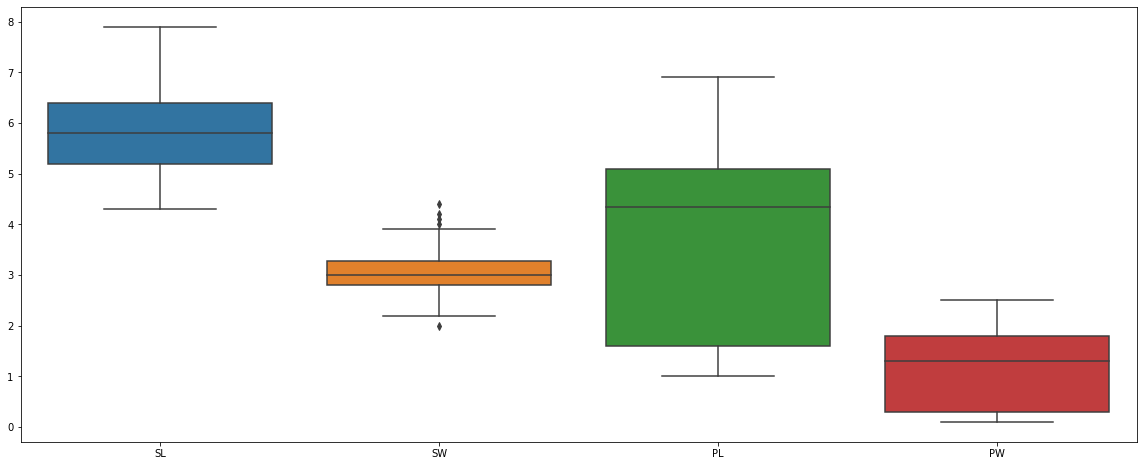

In [12]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data[['SL', 'SW', 'PL', 'PW']])
plt.show()

In [13]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [14]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

2.1249999999999996
3.9250000000000003


In [15]:
outlier=[]
for x in data['SW']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)

In [16]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [17]:
ind1=data['SW']>up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [18]:
data.drop([14, 15, 32, 33],inplace=True)

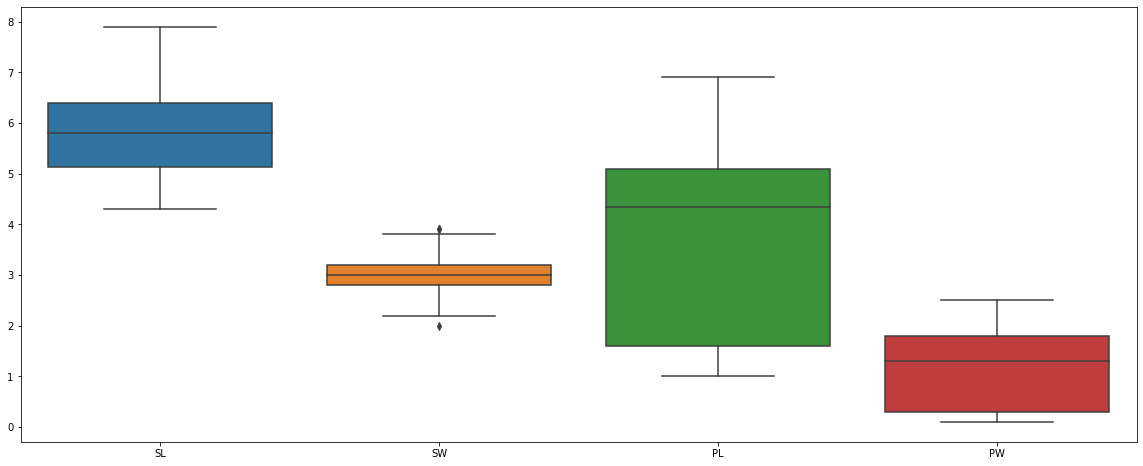

In [19]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data[['SL', 'SW', 'PL', 'PW']])
plt.show()

In [20]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder={}
binary_features=['Classification']
for i in binary_features:
    label_encoder[i]=LabelEncoder()
    data[i]=label_encoder[i].fit_transform(data[i])

In [23]:
data
  

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


# 3. Find out which classification model gives the best result to predict iris species

In [28]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# logistic regression

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)


LogisticRegression()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]


0.9666666666666667

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


0.9333333333333333

# RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


0.9333333333333333

# KERNAL SVM

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [38]:
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


0.9666666666666667

# DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_predict=dt_model.predict(x_test)
accuracy_score(y_test,y_predict)


0.9333333333333333

In [41]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)